In [1]:
from numpy import *
from scipy import *
from matplotlib import *
from pylab import *
#import CoolProp.CoolProp as CP
from scipy.optimize import curve_fit

rc('text',usetex = True)
rc('font', family='serif')

In [2]:
def MFR(X,a,b,c,d):
    f,FB = X
    return(a*f+b*FB+c*f*FB+d)

In [17]:
f  = [0.2,0.6,1,1.4,0.2,0.4,0.6,0.8,1,1.2,1.4,1.6, 0.2,0.2,0.2,0.6,0.6,0.6] 
FB = [0.5,0.5,0.5,0.5,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.4,0.44,0.46,0.4004,0.38,0.32]
P  = [0.6826,1.109,1.49,1.942,0.4292,0.6284,0.8074,0.9864,1.1829,1.3755,1.5769,1.84,0.6338,0.6610,0.667,1.0596,1.0567,1.0166]

In [18]:
M = curve_fit(MFR,(f,FB),P)

In [19]:
M

(array([ 0.90287644,  1.05005219,  0.21974704, -0.0045518 ]),
 array([[ 0.00714305,  0.0150861 , -0.01845843, -0.00601352],
        [ 0.0150861 ,  0.04328626, -0.0406692 , -0.01635838],
        [-0.01845843, -0.0406692 ,  0.05235315,  0.01502161],
        [-0.00601352, -0.01635838,  0.01502161,  0.00660561]]))

In [20]:
def F(f,FB):
    y = M[0][0]*f+  M[0][1]*FB + M[0][2]*FB*f- M[0][3]
    return y

In [21]:
F(1,0.35)

1.351857970186081

In [22]:
f1 = [0.2,0.6,1,1.4] 
f2 = [0.2,0.4,0.6,0.8,1,1.2,1.4,1.6]
f3 = [0.2,0.2,0.2]
f4 = [0.6,0.6,0.6]
P1  = [0.6826,1.109,1.49,1.942]
P2  = [0.4292,0.6284,0.8074,0.9864,1.1829,1.3755,1.5769,1.84]
P3 = [0.6338,0.661,0.667]
P4 = [1.0596,1.0567,1.0166]

In [23]:
f = arange(0.2,1.8,0.1)
P_11 = zeros(len(f))
P_12 = zeros(len(f))
P_13 = zeros(len(f))
P_14 = zeros(len(f))
P_15 = zeros(len(f))
P_16 = zeros(len(f))
P_17 = zeros(len(f))
for i in range(len(f)):
    P_11[i] = F(f[i],0.25)
    P_12[i] = F(f[i],0.5)
    P_13[i] = F(f[i],0.44)
    P_14[i] = F(f[i],0.46)
    P_15[i] = F(f[i],0.40)
    P_16[i] = F(f[i],0.38)
    P_17[i] = F(f[i],0.32)

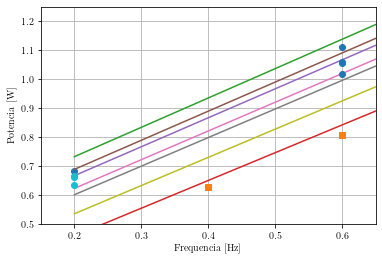

In [24]:
fig, ax = plt.subplots()

plot(f1,P1,'o', label = 'Pontos Experimentais - FB = 0.5')
plot(f2,P2,'s', label = 'Pontos Experimentais - FB = 0.25')
plot(f,P_12, label = 'Ajuste Numerico - FB = 0.5')
plot(f,P_11, label = 'Ajuste Numerico - FB = 0.25')
plot(f,P_13, label = 'Ajuste Numerico - FB = 0.5')
plot(f,P_14, label = 'Ajuste Numerico - FB = 0.25')
plot(f,P_15, label = 'Ajuste Numerico - FB = 0.5')
plot(f,P_16, label = 'Ajuste Numerico - FB = 0.25')
plot(f,P_17, label = 'Ajuste Numerico - FB = 0.5')

plot(f3,P3,'o', label = 'Pontos Experimentais - FB = 0.5')
plot(f4,P4,'o', label = 'Pontos Experimentais - FB = 0.5')

ylim([0.5,1.25])
xlim([0.15,0.65])
grid(True)
xlabel('Frequencia [Hz]')
ylabel('Potencia [W]')
show()

fig.savefig('Valves.pdf',format = 'pdf', dpi=1000,bbox_inches='tight')

In [25]:
f4,P4,F(0.6,0.4004)

([0.6, 0.6, 0.6], [1.0596, 1.0567, 1.0166], 1.0195105900938979)